In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import random
import pylab as pl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import KFold
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score, f1_score
from scipy.spatial.distance import euclidean, cityblock, cosine, correlation
from IPython.display import display, HTML

In [2]:
def getData():
    data = pd.read_table("D:/Users/Daria/Code2/MachineLearning/hw1_kNN/chips.txt", sep=",", header=None, names=['x', 'y', 'class'])
    return data

In [3]:
# k Nearest Neighbors algorithm used for classification
def kNN(k, metrics, train, test):
    result = []
    for point in test:
        distances = [[int(tpoint[1]), metrics(point[0], tpoint[0])] for tpoint in train]
        distances.sort(key=lambda p:p[1])
        #nlargest
        count0 = 0
        count1 = 1
        for i in range(k):
            if (distances[i][0] == 0):
                count0 = count0 + 1
            else:
                count1 = count1 + 1
        prediction = 1
        if (count0 > count1):
            prediction = 0
        result.append([point[0], prediction])
    plt.show()
    return result

In [6]:
# k-fold cross-validation
def training(data, k, metrics):
    kf = KFold(len(data), n_folds=k, shuffle=True)
    averageAccuracy = 0
    averageK = 0
    for train_index, test_index in kf:
        train = [data[i] for i in train_index]
        test = [data[i] for i in test_index]
        maxAccuracy = 0
        bestK = 0
        for kNN_value in range(1, 20, 2): #len(train) // 2):
            result = kNN(kNN_value, metrics, train, test)
            #f1 measure =  2 * (precision * recall) / (precision + recall)
            f1 = f1_score([row[1] for row in test], [row[1] for row in result]) 
            if (f1 > maxAccuracy):
                maxAccuracy = f1
                bestK = kNN_value
        averageAccuracy += maxAccuracy
        averageK += bestK
    averageAccuracy /= k
    averageK /= k
    return averageK, averageAccuracy


In [8]:
data = getData()
# cross_val_score(log_reg, X_train, y_train, cv=5)
# sklearn.metrics.classification_report(y_test, log_reg.predict(X_test))
result = pd.DataFrame(columns=['kNN', 'folds', 'metric', 'transformation', 'accuracy'])
transformations = [[lambda x: x, 'no'] 
                  ,[lambda x: [x[0], x[1], x[0] ** 2 + x[1] ** 2],'x,y -> x, y, x**2 + y**2']
                  ,[lambda x: [x[0], x[1], x[0] * x[1], x[0] ** 2, x[1] ** 2], 'x, y -> x, y, xy, x ** 2, y ** 2']]
metrics = [cityblock, euclidean, cityblock, cosine, correlation]

#find the best value of k
points = data[['x', 'y']].as_matrix()
classes = data['class'].as_matrix()
for fold in [10]:
    for metric in metrics:
        for transform in transformations:
            curPoints = list(map(transform[0], points)) 
            curData = [[list(curPoints[i]), classes[i]] for i in range(len(classes))]
            k, accuracy = training(curData, fold, metric)
            cur = pd.DataFrame([[k, fold, str(metric).split(' ')[1], transform[1], accuracy]], columns=['kNN', 'folds', 'metric', 'transformation', 'accuracy'])
            result = result.append(cur, ignore_index=True)
display(result)
showPoints(result['kNN'], result['accuracy'], 'b', 'o')

,kNN,folds,metric,transformation,accuracy
0,5.2,10.0,cityblock,no,0.757239
1,8.4,10.0,cityblock,"x,y -> x, y, x**2 + y**2",0.817346
2,7.8,10.0,cityblock,"x, y -> x, y, xy, x ** 2, y ** 2",0.754103
3,5.8,10.0,euclidean,no,0.752095
4,7.8,10.0,euclidean,"x,y -> x, y, x**2 + y**2",0.834009
5,9.0,10.0,euclidean,"x, y -> x, y, xy, x ** 2, y ** 2",0.779766
6,7.8,10.0,cityblock,no,0.774733
7,6.8,10.0,cityblock,"x,y -> x, y, x**2 + y**2",0.837680
8,7.8,10.0,cityblock,"x, y -> x, y, xy, x ** 2, y ** 2",0.799511
9,5.0,10.0,cosine,no,0.696440


NameError: name 'showPoints' is not defined

In [ ]:
def showPoints(x_ticks, y_ticks, color, style):
    #plt.subplot(k, 1, num)
    #plt.figure(1).suptitle('neighbors = ' + str(optimalKNN) + '; folds = ' + str(k) + '; metrics = ' + str(metrics), fontsize=14, fontweight='bold')
    #plt.title('accuracy = ' + str(f1))
    plt.plot(x_ticks, y_ticks, color + style)
    plt.show()

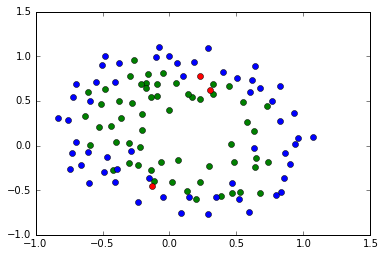

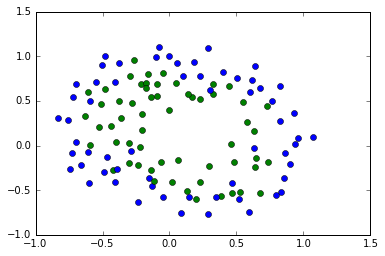

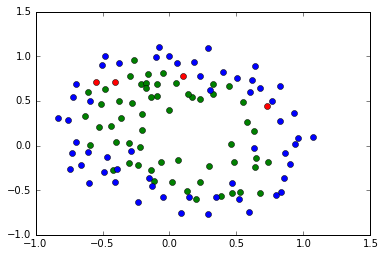

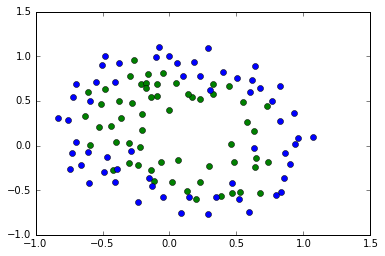

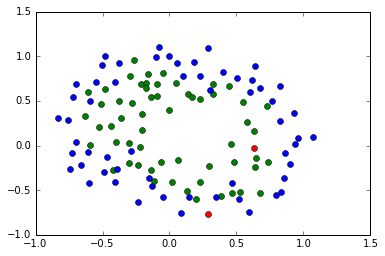

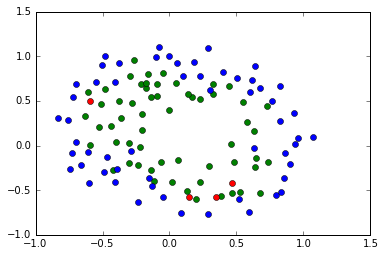

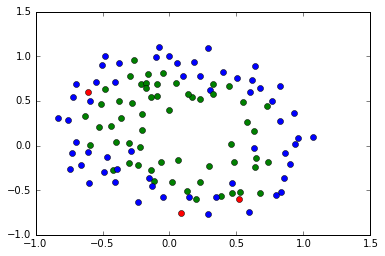

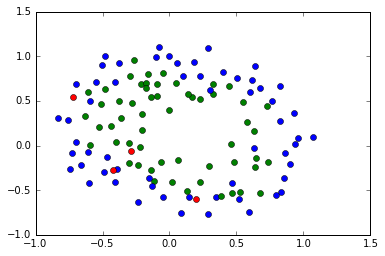

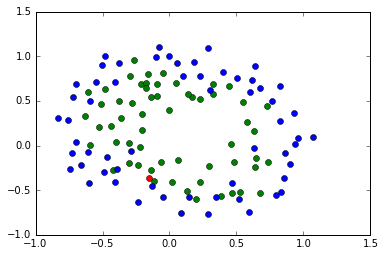

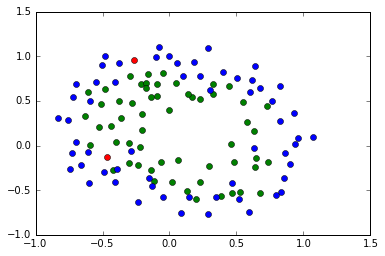

In [11]:
def theBest(kNN, k, metrics, data):
    kf = KFold(len(data), n_folds=k, shuffle=True)
    for train_index, test_index in kf:
        train = [data[i] for i in train_index]
        test = [data[i] for i in test_index]
        for p in train:
            if (p[1] == 0):
                plt.plot(p[0][0], p[0][1], "bo")
            else:
                plt.plot(p[0][0], p[0][1], "go")
        for point in test:
            distances = [[int(tpoint[1]), metrics(point[0], tpoint[0])] for tpoint in train]
            distances.sort(key=lambda p:p[1])
            #nlargest
            count0 = 0
            count1 = 1
            for i in range(k):
                if (distances[i][0] == 0):
                    count0 = count0 + 1
                else:
                    count1 = count1 + 1
            prediction = 1
            if (count0 > count1):
                prediction = 0
            if (prediction == point[1]):
                if (point[1] == 0):
                    plt.plot(point[0][0], point[0][1], "bo")
                else:
                    plt.plot(point[0][0], point[0][1], "go")
            else:
                plt.plot(point[0][0], point[0][1], "ro")
        plt.show()
data = getData()        
points = data[['x', 'y']].as_matrix()
classes = data['class'].as_matrix()
curPoints = list(map(transformations[1][0], points))
curData = [[list(curPoints[i]), classes[i]] for i in range(len(classes))]

theBest(10, 10, cityblock, curData)
# theBest(7, 2, cityblock, curData)

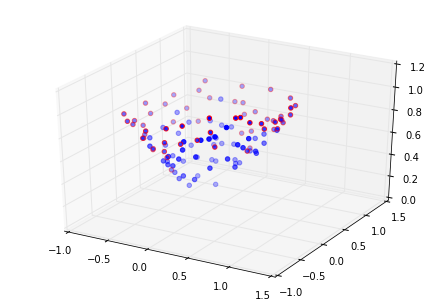

In [12]:
data = getData()        
points = data[['x', 'y']].as_matrix()
classes = data['class'].as_matrix()
data2 = data.as_matrix()
points1 = []
points2 = []
for p in data2:
    if (p[2] == 0):
        points1.append(list(p[:2]))
    else:
        points2.append(list(p[:2]))
f = lambda x: [x[0], y[0]]
fig = plt.figure()
ax = Axes3D(fig)
x = [p[0] for p in points]
xm = np.median(x)
y = [p[1] for p in points]
ym = np.median(y)
z = [euclidean(p, [xm, ym]) for p in points]
ax.scatter(xs=[p[0] for p in points1], ys=[p[1] for p in points1], zs=[euclidean(p, [xm, ym]) for p in points1], zdir='z', color='r')
ax.scatter(xs=[p[0] for p in points2], ys=[p[1] for p in points2], zs=[euclidean(p, [xm, ym]) for p in points2], zdir='z', color='b')

plt.show()


2.0